# Introduction

## What is Pennylane?
Pennylane is a library for programming quantum computers which allows the execution of quantum programs on various backends.
<br>
Pennylane also integrates with other popular Python libraries such as NumPy and PyTorch.


### Documentation:
https://docs.pennylane.ai/en/stable/introduction/circuits.html#device-options
### API Reference:
https://docs.pennylane.ai/en/stable/code/qml.html

### What backends does it support?
- IBM’s Qiskit
- Google’s Cirq
- Rigetti’s Forest
- Xanadu’s Strawberry Fields

# Setup
To setup your environment, please run the provided setup.py script yourself OR run the next cell

In [2]:
!python setup.py

   PennyLane Lab Setup (Smart Mode)
Status: Running inside an active virtual environment.
    Current Python: 3.13.7

[+] Installing packages into CURRENT active environment...

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
    Success: Packages installed.

[+] Creating verification script (verify_install.py)...

[+] SETUP COMPLETE (In current environment)
Run: python verify_install.py


In [3]:
!python verify_install.py


Python Version: 3.13.7
PennyLane Version: 0.43.1
Device created successfully.
Circuit execution result: 0.8775825618903726
SUCCESS: Environment is ready for the lab.


If your environment is ready, you will have seen a SUCCESS message. <br>
Also run this next cell to test the notebook.

In [4]:
import pennylane as qml
print(qml.__version__)

0.43.1


# Syntax

## Pennylane is backend agnostic. How does it abstract it away?

In [5]:
# Wires == No. Qubits
dev = qml.device('default.qubit', wires=2)

Parameters:
  - Name: needs a string to identify the type of devices you run on
    - Is it a simulator or a real quantum computer
  - To see the possibilities, consult the docs: https://docs.pennylane.ai/en/stable/code/qml_devices.html <br> or use qml.about() to see the devices avaialble on your system

In [5]:
qml.about()

Name: pennylane
Version: 0.43.1
Summary: PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry. Train a quantum computer the same way as a neural network.
Home-page: 
Author: 
Author-email: 
License: 
Location: /home/cake/PyCharmMiscProject/.venv/lib/python3.13/site-packages
Requires: appdirs, autograd, autoray, cachetools, diastatic-malt, networkx, numpy, packaging, pennylane-lightning, requests, rustworkx, scipy, tomlkit, typing_extensions
Required-by: PennyLane-qiskit, pennylane_lightning

Platform info:           Linux-6.17.7-arch1-1-x86_64-with-glibc2.42
Python version:          3.13.7
Numpy version:           2.3.3
Scipy version:           1.16.3
JAX version:             None
Installed devices:
- lightning.qubit (pennylane_lightning-0.43.0)
- default.clifford (pennylane-0.43.1)
- default.gaussian (pennylane-0.43.1)
- default.mixed (pennylane-0.43.1)
- default.qubit (pennylane-0.43.1)
- default.qutrit (pennylane-0.43.1)

| Device Name | Type | Primary Use Case |
| :--- | :--- | :--- |
| **`default.qubit`** | Built-in Simulator | **Prototyping & Learning.** Standard pure-state simulator. Supports backpropagation; ideal for ML and small algorithms. |
| **`default.mixed`** | Built-in Simulator | **Noisy Simulations.** Simulates mixed states (density matrices) to model noise (decoherence, flip errors). |
| **`default.gaussian`** | Built-in Simulator | **Photonic Quantum Computing.** Simulates continuous-variable (CV) systems using Gaussian states. |
| **`default.clifford`** | Built-in Simulator | **Massive Scale Clifford Circuits.** Optimized for circuits with only Clifford gates; simulates thousands of qubits. |
| **`default.tensor`** | Built-in Simulator | **Tensor Networks.** Uses `quimb` backend. Efficient for specific low-entanglement circuit architectures. |
| **`lightning.qubit`** | High-Performance | **Speed (CPU).** C++ state-vector simulator. Faster than `default.qubit` for intermediate (20+) qubit circuits. |
| **`lightning.gpu`** | High-Performance | **Speed (GPU).** NVIDIA cuQuantum-powered simulator. Essential for large circuits (25-30+ qubits). |
| **`qiskit.aer`** | Plugin (`pennylane-qiskit`) | **IBM Compatibility.** Access to IBM's high-performance Aer simulator and noise models. |
| **`braket.aws.qubit`** | Plugin (`pennylane-braket`) | **Cloud Hardware Access.** Gateway to AWS Braket for hardware from IonQ, Rigetti, QuEra, and OQC. |
| **`cirq.simulator`** | Plugin (`pennylane-cirq`) | **Google Compatibility.** Wraps Google's Cirq simulator for cross-validation and specific circuit definitions. |

### Wires


Wires are simple labels for qubits

The easiest way to define a lot of wires is by specifying how many you need
<br> The wires will be <span style="color:orange"> 0 indexed </span>

In [ ]:
# This makes a circuit with wires 0, 1 and 2
dev_wires = qml.device('default.qubit', wires=3)

Some times,
<br>  _especially when making a presentation ;)_ <br>
you might want to label the wires with some names.
<br> With pennylane, you can.
<br> We all love our friends <span style="color:green">**Alice** and **Bob**</span>, so I'll ask them for help here

In [61]:
dev_wires = qml.device('default.qubit', wires=['Alice', 'Bob'])
@qml.qnode(dev_wires)
def entangle_alice_and_bob():
    qml.Hadamard(wires='Alice')
    qml.CNOT(wires=['Alice', 'Bob'])
    return qml.state()

entangle_alice_and_bob()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

### Shots

Pennylane offers two main ways of running circuits:
  - in their general mathematical sense
  - using "*shots*", where you will have the randomness that comes with quantum hardware(either simulated or realistic)

The default for simulated devices is None. <br>
For the hardware plugins, it varies by provider.

In [51]:
dev_ex_shots = qml.device("default.qubit", wires=1)

# you can always check how many shots a devices has by doing
print(f"Device has: {dev_ex_shots.shots} shots")


Device has: Shots(total=None) shots


The behavior above is getting deprecated, we'll see the modern approach below

#### Good to know:
if you run your code with shots on a real quantum computer(eg IBM's, AWS Bracket, etc)
<br> YOU PAY FOR EVERY SHOT

In [11]:
#We'll define a simple circuit and see what difference this makes
def shots_circuit():
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

#### Mathematical

In [13]:
dev_no_shots = qml.device("default.qubit", wires=1, shots=None)

In [45]:
no_shots_circuit = qml.QNode(shots_circuit, dev_no_shots)
no_shots_circuit()

np.float64(0.0)

#### Simulated / Hardware

In [20]:
dev_with_shots = qml.device("default.qubit", wires=1)

In [55]:
shots_circuit_ex = qml.QNode(shots_circuit, dev_with_shots, shots=1000)
# the output here will be the average of the 1000 shots
shots_circuit_ex()

np.float64(0.034)

In [57]:
#To address the mention above, regarding the api change
shots_circuit_ex.shots
# is how you find out the number of shots if it is defined in the Qnode, not the device ( the new standard)

Shots(total_shots=1000, shot_vector=(ShotCopies(1000 shots x 1),))

### How to get results?

In [9]:
#Might give a dep warning, but the api is fine for this case
dev_result = qml.device("default.qubit", wires=1, shots=10)

In [34]:
@qml.qnode(dev_result)
def measurement_demo():
    qml.Hadamard(wires=0)
    # Try swapping these out to see the difference!
    # return qml.probs(wires=0)   # Theoretical probabilities
    # return qml.expval(qml.PauliZ(0)) # Expectation value
    return qml.sample(qml.PauliZ(0))   # Raw measurement shots

print(f"Measurement results: {measurement_demo()}")

Measurement results: [-1.  1. -1. -1.  1.  1. -1.  1. -1. -1.]


## Running the same circuit with multiple devices

Because of practical constraints, we'll focus on the local models during the lab.
<br>
However we provided instructions for how to connect it to AWS and/or Google Cloud down below

In [35]:
# Lets first define the a list of devices.
# As they are strings, it is trivial
devices = ['default.qubit','lightning.qubit', 'default.clifford']

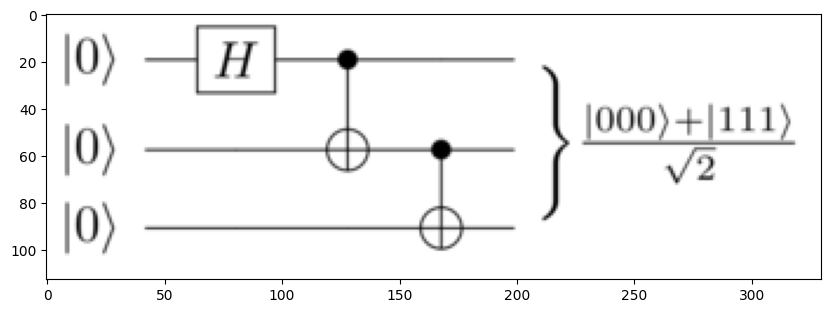

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#image from https://upload.wikimedia.org/wikipedia/en/thumb/5/57/The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png/330px-The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png
ghz_circuit = mpimg.imread("images/GHZ_state.png")
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(ghz_circuit)


Reminder: to use any gate you can do qml.GATE_NAME
<br>
For example: qml.Hadamard(wires=0)

In [36]:
# As our base circuit, we'll use one to generate a 3 qubit entagled state(GHZ state)
def ghz_circuit():
    #TODO:
    qml.Hadamard(wires=0)
    for i in range(1,3):
        qml.CNOT(wires=[i,0])
    return qml.counts()

In [37]:
for dev_name in devices:
    dev = qml.device(dev_name, wires=3, shots=1000)
    qnode = qml.QNode(ghz_circuit, dev)
    counts = qnode()
    print(f"Device: {dev_name} | Counts: {counts}")

Device: default.qubit | Counts: {np.str_('000'): np.int64(508), np.str_('100'): np.int64(492)}
Device: lightning.qubit | Counts: {np.str_('000'): np.int64(530), np.str_('100'): np.int64(470)}
Device: default.clifford | Counts: {np.str_('000'): np.int64(505), np.str_('100'): np.int64(495)}


# Simple Exercises

Let's start with a simple exercise to see how we work with pennylane

### 1. Use rotations to take a |0> and rotate it such that its projection on the Z axis is 0.

## Visual explanation:

(np.float64(-0.5), np.float64(1023.5), np.float64(558.5), np.float64(-0.5))

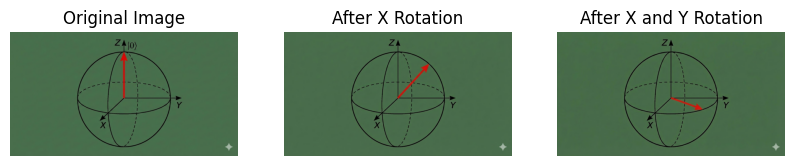

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('images/bloch_init.jpg')
img2 = mpimg.imread('images/Bloch-x rotated.jpg')
img3 = mpimg.imread('images/Bloch-xy-rotated.jpg')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))


axes[0].imshow(img1)
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].set_title("After X Rotation")
axes[1].axis('off')
axes[2].imshow(img3)
axes[2].set_title("After X and Y Rotation")
axes[2].axis('off')


## Implementation

In [44]:
dev = qml.device("default.qubit", wires=1, shots=1000)

In [45]:
@qml.qnode(dev)
def rotate_qbit(phi, theta):
    #TODO:
    qml.RX(phi, wires=0)
    qml.RY(theta, wires=0##)
    return qml.expval(qml.PauliZ(0))



In [47]:
import numpy as np
phi, theta = np.pi/4, np.pi/2
result = rotate_qbit(phi, theta)
print(result)


-0.06


### BONUS: find an alternative way to call your function such that it gives the same result

In [49]:
phi, theta = np.pi/2, np.pi/4
result2 = rotate_qbit(phi, theta)
print(result2)
# assert result == result2

0.002


## Basics of QML(Quantum Machine Learning)

need to put some info / wiki here

### Making a model to force the state of a qubit to state |1>

In [50]:
dev = qml.device("default.qubit", wires=1)

In [51]:
# 1. THE MODEL (The Neural Network equivalent)
# Instead of neurons, we have wires. Instead of weights, we have rotation angles.
@qml.qnode(dev)
def quantum_model(weights):
    # 'weights' are the trainable parameters (like neural net weights)
    # We apply rotations to the qubit based on these weights.
    qml.RX(weights[0], wires=0)
    qml.RY(weights[1], wires=0)

    # THE OUTPUT layer: We measure the "spin" in the Z direction.
    # Result = +1 (State |0>) to -1 (State |1>)
    return qml.expval(qml.PauliZ(0))


In [53]:
# 2. THE LOSS FUNCTION
# We want to force the qubit into the |1> state (value -1).
# So, our goal is to minimize the output value.
def loss_fn(params):
    prediction = quantum_model(params)
    return prediction # We want to make this number as low as possible (-1)


In [55]:
from pennylane import numpy as np

In [56]:
# 3. THE OPTIMIZER (Gradient Descent)
# PennyLane automatically calculates the gradients of the quantum gates!
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Initialize random "weights" (rotation angles)
# requires_grad=True tells PennyLane "Train this variable!"
weights = np.array([0.011, 0.012], requires_grad=True)

print(f"Initial Weights: {weights}")
print(f"Initial Output (should be near +1): {quantum_model(weights):.4f}")

print("\n--- TRAINING START ---")
for i in range(50):
    # The optimizer computes the gradient of the circuit and updates weights
    weights = opt.step(loss_fn, weights)

    if (i + 1) % 5 == 0:
        current_loss = loss_fn(weights)
        print(f"Step {i+1}: Loss = {current_loss:.4f}")

print("--- TRAINING END ---")
print(f"Optimized Weights: {weights}")
print(f"Final Output (should be near -1): {quantum_model(weights):.4f}")

Initial Weights: [0.011 0.012]
Initial Output (should be near +1): 0.9999

--- TRAINING START ---
Step 5: Loss = 0.9962
Step 10: Loss = 0.8975
Step 15: Loss = 0.1440
Step 20: Loss = -0.1537
Step 25: Loss = -0.9152
Step 30: Loss = -0.9994
Step 35: Loss = -1.0000
Step 40: Loss = -1.0000
Step 45: Loss = -1.0000
Step 50: Loss = -1.0000
--- TRAINING END ---
Optimized Weights: [8.84922614e-07 3.14159175e+00]
Final Output (should be near -1): -1.0000


## Making a supervised learning system to mimic a sine wave

# Proposed exercises

In [57]:
import pennylane as qml
from pennylane import numpy as np

# 1. Setup the Universe (3 wires)
dev = qml.device("default.qubit", wires=["Message", "Alice", "Bob"])

# --- 2. Helper Functions for the Presentation ---

def create_entangled_bridge():
    """Create a Bell pair between Alice and Bob."""
    qml.Hadamard(wires="Alice")
    qml.CNOT(wires=["Alice", "Bob"])

def alice_operations():
    """Alice interacts the message with her entangled qubit."""
    # CNOT from Message to Alice's entangled qubit
    qml.CNOT(wires=["Message", "Alice"])
    # Hadamard on the Message
    qml.Hadamard(wires="Message")

def bob_correction():
    """Bob uses Alice's 'classical' results to fix his state.
    In a real device, this happens after measurement.
    Here, we simulate the logic using controlled gates."""

    # If Alice's entangled qubit (Alice) is 1, apply X
    qml.CNOT(wires=["Alice", "Bob"])

    # If Alice's message qubit (Message) is 1, apply Z
    qml.CZ(wires=["Message", "Bob"])

# --- 3. The Main Experiment ---

@qml.qnode(dev)
def teleportation_circuit(state_angles):
    # STEP A: Prepare the state Alice wants to send
    # We use arbitrary angles to create a unique unknown state |psi>
    qml.RX(state_angles[0], wires="Message")
    qml.RY(state_angles[1], wires="Message")

    # STEP B: Create the shared resource (Entanglement)
    create_entangled_bridge()

    # STEP C: Alice performs her measurements/operations
    alice_operations()

    # STEP D: Bob receives info and corrects his state
    bob_correction()

    # verification: Return the state of Bob's qubit
    return qml.state()

# --- 4. Running the Experiment ---

# Let's pick a random state for Alice to send
angles = [0.5, 1.2]

# Run the teleportation
final_system_state = teleportation_circuit(angles)

# To verify, let's create what the state SHOULD look like
dev_verify = qml.device("default.qubit", wires=1)
@qml.qnode(dev_verify)
def target_state_circuit(angles):
    qml.RX(angles[0], wires=0)
    qml.RY(angles[1], wires=0)
    return qml.state()

target_state = target_state_circuit(angles)

print("Teleportation Complete!")
# We look at the density matrix or state vector relative to Bob to verify overlap
# (Simplified verification for presentation purposes would be comparing measuring stats)
print(f"Target State Vector (first few terms): {target_state[:2]}")
# Note: Inspecting the full state vector of the 3-qubit system is complex,
# but Bob's subspace should match the target.

Teleportation Complete!
Target State Vector (first few terms): [0.79967793+0.13969478j 0.54708911-0.2041913j ]
